In [1]:
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from sympy import *


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Variational Theory

Variational theory relies on the fact that the true ground state of a quantum system has lower energy than any other state. This includes superpositions of all eigenstates, and since the eigenstates make a complete set, it includes *all* well-behaved functions. We can state this fundamental principle of variational theory in terms of the variational integral:

$$E_0 \leq E_\phi = \frac{\int \phi^*\hat{H}\phi d\tau}{\int \phi^*\phi d\tau}$$

### PIB Example

Consider the particle in a box system (with box length of 1). This system is solvable, so we know the true ground state wavefunction and energy:

$$\Psi_1(x) = \sqrt{2}\sin\left(\pi x\right)$$

$$E_1 = \frac{h^2}{8m}$$

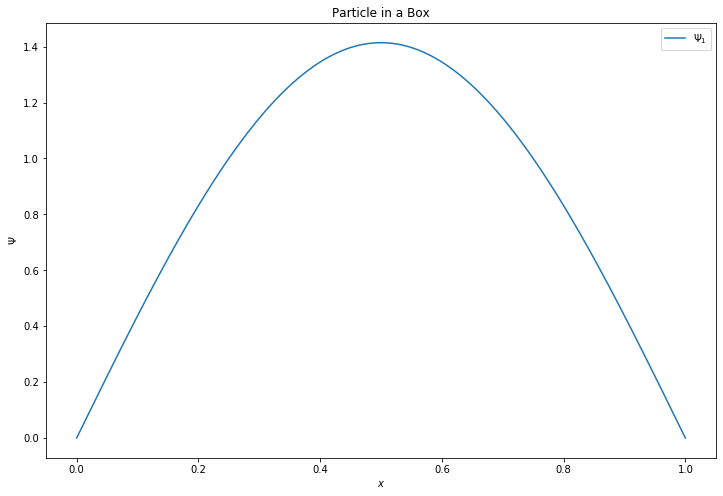

In [2]:
xvals = np.linspace(0,1,1000)
psi = np.sqrt(2)*np.sin(np.pi*xvals)

plt.figure()
plt.plot(xvals, psi, label = '$\Psi_1$')
plt.xlabel(r'$x$')
plt.ylabel(r'$\Psi$')
plt.title(r'Particle in a Box')
plt.legend()
plt.show()

We can give a number of trial functions which obey the same boundary conditions, and look more or less like $\Psi_1$.
$$\phi_1 = \sqrt{30}\left(-x^2+x\right)$$
$$\phi_2 = \sqrt{\frac{105}{8}}\left(-x^3 + x\right)$$

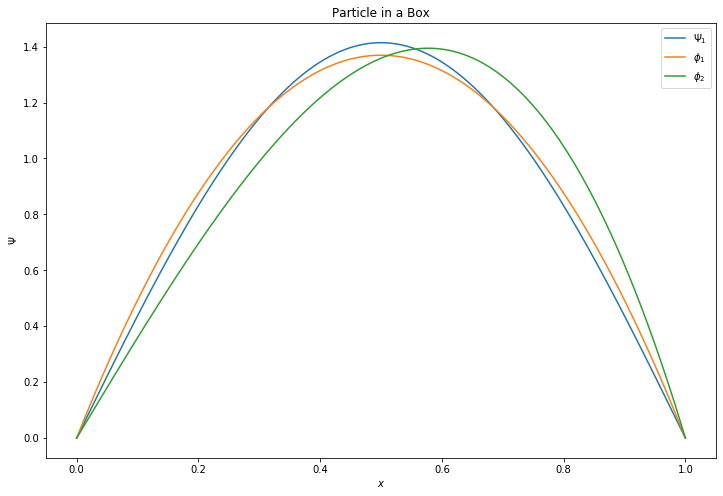

In [3]:
phi_1 = np.sqrt(30)*(-xvals*xvals + xvals)
phi_2 = np.sqrt(105/8)*(-xvals**3 +xvals)

plt.figure()
plt.plot(xvals, psi, label = '$\Psi_1$')
plt.plot(xvals, phi_1, label = '$\phi_1$')
plt.plot(xvals, phi_2, label = '$\phi_2$')
plt.xlabel(r'$x$')
plt.ylabel(r'$\Psi$')
plt.title(r'Particle in a Box')
plt.legend()
plt.show()

By inspection, we might guess that $\phi_1$ is a better approximation to the true ground state, but let's find the energies. We will take the variational integral:
$$\frac{\int \phi^*\hat{H}\phi d\tau}{\int \phi^*\phi d\tau}$$

Note that since these functions are already normalized we don't need to find the denominator, but to make these tools more robust we will find it anyway.

In [4]:
x, m, hbar, h, a, W = symbols('x m hbar h α W')

def variational(function):
    ham = - hbar**2 / (2*m) * diff(diff(function, x), x)
    integral = integrate(function * ham, (x,0,1))
    normalization = integrate(function * function, (x,0,1))
    return integral / normalization

function1 = -np.sqrt(30)*(x**2-x)
function2 = np.sqrt(105/8)*(-1*x**3 +x)

v0 = h**2/(8*m)
v1 = variational(function1).replace(hbar, h/(2*np.pi))
v2 = variational(function2).replace(hbar, h/(2*np.pi))

print('The energies are:')
print('phi_1: {}'.format(v1))
print('phi_2: {}'.format(v2))
print('')
print('Which are greater than the true energy by factors of:')
print('phi_1: {}'.format(v1/v0))
print('phi_2: {}'.format(v2/v0))

The energies are:
phi_1: 0.126651479552922*h**2/m
phi_2: 0.132984053530568*h**2/m

Which are greater than the true energy by:
phi_1: 1.01321183642338
phi_2: 1.06387242824455


As suspected, the first trial function has slightly lower energy. $\phi_2$ is obviously lopsided and therefore probably a poor choice for finding position probabilities. However, we saw that it performs surprisingly well at estimating the ground state energy. This is probably because in a flat potential system like this, energy is most closely related to curvature, and nothing else.

#### Minimizing a Parameter with Variational Theory

Variational theory relies on picking a good trial function. The guesswork for this can be greatly reduced if you choose a parameterized trial function, then minimize the energy based on that parameter. For example, a trial function for the particle in a box could be:

$$\phi = \left(x-x^3\right) + \alpha\left(x^5-\frac{1}{2}\left(x^7+x^9\right)\right)$$

Here, $\alpha$ is a parameter which can be varied to minimize the energy. Note that this trial function is not normalized, since the normalization constant would be a complex function of $\alpha$.

In [28]:
function3 = x-x**3+a*(x**5-1/2*(x**7+x**9))
v3 = variational(function3).replace(hbar, h/(2*np.pi))
solutions = solve(diff(v3, a), a)
print('Possible solutions for α are: {}'.format(solutions))

print('The energies are:')
for solution in solutions:
    alpha = re(solution)  # Some infinitesimal imaginary parts are in these solutions. Trim them off.
    energy = variational(function3.replace(a, alpha)).replace(hbar, h/(2*np.pi))
    print('  For α = {}:'.format(alpha))
    print('    E = {}'.format(energy))
    print('    E/E1 = {}'.format(energy/v0))
    


Possible solutions for α are: [-5.74056963343574 - 0.e-22*I, -0.344647139378358 - 0.e-21*I, 103685217717339.0 - 0.e-21*I]
The energies are:
  For α = -5.74056963343574:
    E = 1.02555713769286*h**2/m
    E/E1 = 8.20445710154286
  For α = -0.344647139378358:
    E = 0.127017901400659*h**2/m
    E/E1 = 1.01614321120527
  For α = 103685217717339:
    E = 0.710769850680755*h**2/m
    E/E1 = 5.68615880544604


The solution α = -0.344647 gives an energy very close to the true energy, and only slightly worse than our first trial function.

#### Linear Variational Theory

We can use linear algebra to find an even better trial function by combining other functions. For example, we could create a basis of two trial functions, $\phi_1$ from before and $\phi_4$, a new function. We first note that $\phi_1$ is a wider peak than $\Psi_1$, so a smart choice might be to make $\phi_4$ more narrow than $\Psi_1$. Although it is a bit contrived, something like a $\sin^2(\pi x)$ would work:

$$\phi_4=\sqrt{\frac{8}{3}}\sin^2\left(\pi x\right)$$

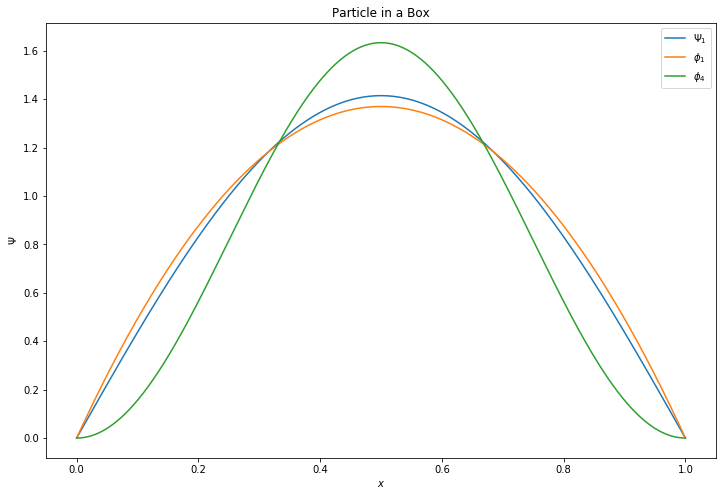

The energy for phi_4 is: 0.166666666666667*h**2/m
Which is greater than the true energy by: 1.33333333333333


In [6]:
phi_4 = np.sqrt(8/3)*np.sin(np.pi*xvals)**2

plt.figure()
plt.plot(xvals, psi, label = '$\Psi_1$')
plt.plot(xvals, phi_1, label = '$\phi_1$')
plt.plot(xvals, phi_4, label = '$\phi_4$')
plt.xlabel(r'$x$')
plt.ylabel(r'$\Psi$')
plt.title(r'Particle in a Box')
plt.legend()
plt.show()

function4 = np.sqrt(8/3)*sin(pi*x)*sin(pi*x)

v4 = variational(function4).replace(hbar, h/(2*pi)).replace(pi,np.pi)

print('The energy for phi_4 is: {}'.format(v4))

print('Which is greater than the true energy by: {}'.format(v4/v0))

Since $\phi_1$ is too wide and $\phi_4$ is too narrow, we can imagine that a proper combination of the two of them will give better results than either one alone. We find that proper combination using the "Secular Equation:"

In [7]:
def overlap(func1, func2):
    S = integrate(func1*func2, (x,0,1)).replace(pi,np.pi)
    return S
    
def hamiltonian(func1, func2):
    ham = - hbar**2 / (2*m) * diff(diff(func2, x), x)
    integral = integrate(func1 * ham, (x,0,1)).replace(hbar, h/(2*np.pi)).replace(pi,np.pi)
    return integral

funcs = [function1, function4]
H=[[0,0],[0,0]]
S=[[0,0],[0,0]]
for i in range(2):
    for j in range(2):       
        S[i][j] = overlap(funcs[i],funcs[j])
        H[i][j] = hamiltonian(funcs[i],funcs[j])

In [8]:
secular = (H[0][0]-S[0][0]*W)*(H[1][1] - S[1][1]*W) - (H[1][0]-S[1][0]*W)*(H[0][1]-S[0][1]*W)
solutions = solve(secular, W)
print('The solutions to the secular equation are:')
print(solutions)
print('The first solution is greater than the true energy by: {}'.format(solutions[0]/v0))

The solutions to the secular equation are:
[0.125023994751433*h**2/m, 1.19536641432635*h**2/m]
The first solution is greater than the true energy by: 1.00019195801147


This solution, which is a linear combination of the two functions, gives the best energy so far - only about 0.02 % off!
The other solution gives an upper-bound for the first excited state, but it is not very good. We know that the first excited state should have energy of $\frac{h^2}{2m}$, and our second solution to the secular equation is more than double that. However, we haven't included any functions with odd symmetry, or with any nodes, so our two functions can hardly be expected to represent anything other than the ground state.

Now, we have the energy, but how can we get the coefficients to construct the actual function?

In [30]:
equations = [[0,0],[0,0]]
for i in range(2):
    for j in range(2):
        equations[i][j] = H[i][j] - S[i][j]*solutions[0]
equations = Matrix(equations).replace(pi, np.pi)#.replace(h,1).replace(m,1)
coefficients = equations.LUsolve(Matrix(2,1,[0,0]))
pprint(coefficients)

⎡0⎤
⎢ ⎥
⎣0⎦


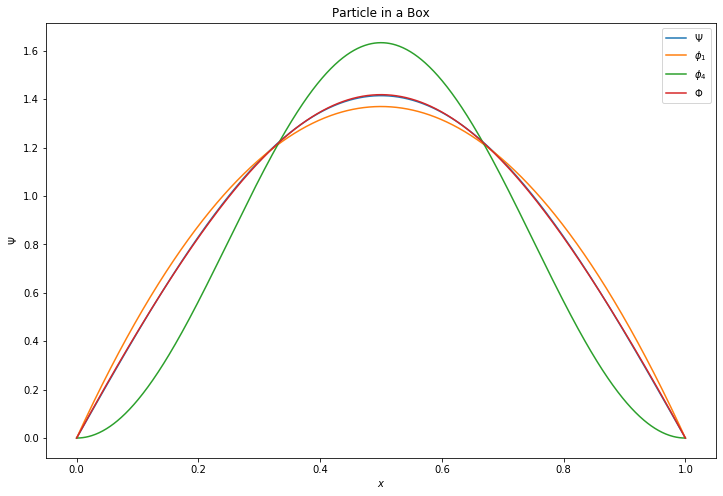

In [10]:
plt.figure()
plt.plot(xvals, psi, label='$\Psi$')
plt.plot(xvals, phi_1, label = '$\phi_1$')
plt.plot(xvals, phi_4, label = '$\phi_4$')
plt.plot(xvals, 0.83832178607538788*phi_1+0.1655685527498891*phi_4, label = '$\Phi$')
plt.xlabel(r'$x$')
plt.ylabel(r'$\Psi$')
plt.title(r'Particle in a Box')
plt.legend()
plt.show()

In [11]:
trial = function1+0.1978*function4
vt = variational(trial).replace(hbar, h/(2*pi)).replace(pi,np.pi)
ratio = vt/v0
print(ratio)

1.00019196073908


In [24]:
trial = function1+0.1977*function4
vt = variational(trial).replace(hbar, h/(2*pi)).replace(pi,np.pi)
ratio = vt/v0
print(ratio)

8*m*(0.884141278303417*hbar**2/m - hbar**2*(-11.7682825566068 - 0.05211372*pi**2)/(2*m))/(h**2*(0.884141278303417/pi**2 + 1.33379904943447))


In [13]:
trial = function1+0.1975*function4
vt = variational(trial).replace(hbar, h/(2*pi)).replace(pi,np.pi)
ratio = vt/v0
print(ratio)

1.00019196664565


In [14]:
trial = 0.98101218485*function1+0.193946108945*function4
vt = variational(trial).replace(hbar, h/(2*pi)).replace(pi,np.pi)
ratio = vt/v0
print(ratio)

1.00019195802631


In [15]:
print(1/Out[144])
print(0.1977/Out[144])


KeyError: 144

In [31]:
trial = function1+0.1975*function4
print(integrate(trial**2, (x,0,1)).replace(pi,np.pi))

1.42291348344055


In [32]:
norm = np.sqrt(1.42291348344055)
c1 = 1/norm
c2 = 0.1975/norm
print(c1,c2)

0.8383217860753879 0.1655685527498891


trial = c1*function1+c2*function4
print(integrate(trial**2, (x,0,1)).replace(pi,np.pi))

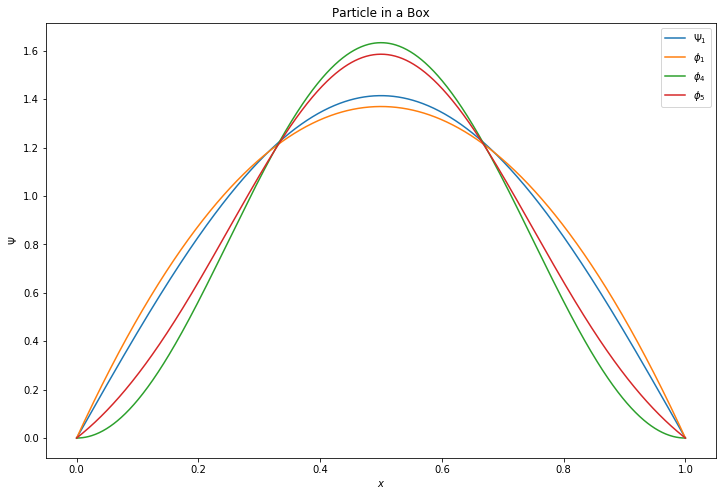

999.0000000000002 998.999999998997 999.0


In [34]:
phi_5 = (np.exp(-8*(xvals - 1/2)**2) - np.exp(-2))*1.833531489737088
phi_4 = np.sqrt(8/3)*np.sin(np.pi*xvals)**2

plt.figure()
plt.plot(xvals, psi, label = '$\Psi_1$')
plt.plot(xvals, phi_1, label = '$\phi_1$')
plt.plot(xvals, phi_4, label = '$\phi_4$')
plt.plot(xvals, phi_5, label = '$\phi_5$')
plt.xlabel(r'$x$')
plt.ylabel(r'$\Psi$')
plt.title(r'Particle in a Box')
plt.legend()
plt.show()


print(np.sum(psi**2), np.sum(phi_1**2), np.sum(phi_4**2))
#function4 = exp(-8*(x-1/2)**2) - exp(-2)

#v4 = variational(function4).replace(hbar, h/(2*pi)).replace(pi,np.pi)

#print('The energy for phi_4 is: {}'.format(v4))

#print('Which is greater than the true energy by: {}'.format(v4/v0))